In [2]:
import pandas as pd
import json

# DATA COLLECTION

In [5]:
with open('resumes_dataset.jsonl', 'r', encoding='utf-8') as f:
    resumes = [json.loads(line) for line in f]
# Each record is now a Python dictionary

{'Category': 'Java Developer',
 'Education': 'Computer Science degree',
 'Email': 'contact@email.com',
 'Experience': 'jessica claire montgomery street san francisco ca 94105 555 '
               '4321000 resumesampleexamplecom professional summary highly '
               'skilled software development professional bringing 10 years '
               'software design development integration advanced knowledge '
               'java skills agile html xml jdbc tomcat work history senior '
               'java developertech lead 2014 current synnex corporation tracy '
               'ca java developer agile scrum team javascript java develop '
               'customer facing internal web applications underlying component '
               'applications wrote ...',
 'Location': 'City, State',
 'Name': 'Chad Griffin',
 'Phone': '94105 555 4321000          10                     '
          '2014                                    102011 '
          '112013                        092008 102011 

In [9]:
from pprint import pprint
pprint(resumes[:2])
print(type(resumes))

[{'Category': 'Java Developer',
  'Education': 'Computer Science degree',
  'Email': 'contact@email.com',
  'Experience': 'jessica claire montgomery street san francisco ca 94105 555 '
                '4321000 resumesampleexamplecom professional summary highly '
                'skilled software development professional bringing 10 years '
                'software design development integration advanced knowledge '
                'java skills agile html xml jdbc tomcat work history senior '
                'java developertech lead 2014 current synnex corporation tracy '
                'ca java developer agile scrum team javascript java develop '
                'customer facing internal web applications underlying '
                'component applications wrote ...',
  'Location': 'City, State',
  'Name': 'Chad Griffin',
  'Phone': '94105 555 4321000          10                     '
           '2014                                    102011 '
           '112013                     

In [10]:
len(resumes)

3500

In [11]:
df = pd.DataFrame(resumes)
df.head()

,ResumeID,Category,Name,Email,Phone,Location,Summary,Skills,Experience,Education,Text,Source
0,REAL_0001,Java Developer,Chad Griffin,contact@email.com,94105 555 4321000 10 ...,"City, State",jessica claire montgomery street san francisco...,"Python, SQL, Git, Linux",jessica claire montgomery street san francisco...,Computer Science degree,jessica claire montgomery street san francisco...,ResumeAtlas
1,REAL_0002,Java Developer,Melinda Thomas,contact@email.com,17994568777 2017 2018 20152016 3 ...,"City, State",jared arthur maica java developer 17994568777 ...,"Python, SQL, Git, Linux",jared arthur maica java developer 17994568777 ...,Computer Science degree,jared arthur maica java developer 17994568777 ...,ResumeAtlas
2,REAL_0003,Java Developer,Shannon Mccarthy,contact@email.com,9 555 4321000 94105 8 ...,"City, State",jessica claire 9 resumesampleexamplecom 555 43...,"Python, SQL, Git, Linux",jessica claire 9 resumesampleexamplecom 555 43...,Computer Science degree,jessica claire 9 resumesampleexamplecom 555 43...,ResumeAtlas
3,REAL_0004,Java Developer,Christine Kelley,contact@email.com,9 555 4321000 94105 5 ...,"City, State",jessica claire 9 resumesampleexamplecom 555 43...,"Python, SQL, Git, Linux",jessica claire 9 resumesampleexamplecom 555 43...,Computer Science degree,jessica claire 9 resumesampleexamplecom 555 43...,ResumeAtlas
4,REAL_0005,Java Developer,Karen Holt,contact@email.com,100 10 4321000 ...,"City, State",jessica claire 100 montgomery st 10th floor xx...,"Python, SQL, Git, Linux",jessica claire 100 montgomery st 10th floor xx...,Computer Science degree,jessica claire 100 montgomery st 10th floor xx...,ResumeAtlas


In [12]:
df.columns

Index(['ResumeID', 'Category', 'Name', 'Email', 'Phone', 'Location', 'Summary',
       'Skills', 'Experience', 'Education', 'Text', 'Source'],
      dtype='object')

In [13]:
df.shape

(3500, 12)

In [14]:
df.isnull().sum()

ResumeID      0
Category      0
Name          0
Email         0
Phone         0
Location      0
Summary       0
Skills        0
Experience    0
Education     0
Text          0
Source        0
dtype: int64

In [15]:
df['Category'].value_counts()

Java Developer               200
Data Science                 200
Python Developer             200
DevOps                       180
SQL Developer                180
Web Designing                150
Business Analyst             150
React Developer              150
Testing                      150
Database                     150
DotNet Developer             140
Software Developer           134
ETL Developer                120
Network Security Engineer    120
Full Stack Developer         102
SAP Developer                100
Digital Media                100
Cloud Engineer                92
Machine Learning Engineer     81
Frontend Developer            76
Backend Developer             76
AI Engineer                   71
Cybersecurity Analyst         66
QA Engineer                   61
Database Administrator        56
UI/UX Designer                51
Blockchain                    47
Mobile Developer              46
Site Reliability Engineer     46
System Administrator          40
Technical 

# Text Preprocessing

In [16]:
def combine_text(row):
    fields = ['Summary', 'Text', 'Skills', 'Experience', 'Education']
    return " ".join(str(row[f]) for f in fields if f in row and pd.notnull(row[f]))

df['full_text'] = df.apply(combine_text, axis=1)

In [17]:
df['full_text'][0][:500]

'jessica claire montgomery street san francisco ca 94105 555 4321000 resumesampleexamplecom professional summary highly skilled software development professional bringing 10 years software design devel... jessica claire montgomery street san francisco ca 94105 555 4321000 resumesampleexamplecom professional summary highly skilled software development professional bringing 10 years software design development integration advanced knowledge java skills agile html xml jdbc tomcat work history senior'

In [18]:
import re

def clean_text(text):
    text = text.lower()

    text = re.sub(r'\S+@\S+', ' ', text)          # emails
    text = re.sub(r'http\S+', ' ', text)          # urls
    text = re.sub(r'\d{10,}', ' ', text)          # long numbers
    text = re.sub(r'[^a-z\s]', ' ', text)         # keep alphabets
    text = re.sub(r'\s+', ' ', text).strip()      # normalize spaces
    
    return text

df['clean_text'] = df['full_text'].apply(clean_text)


In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [w for w in tokens if w not in stop_words and len(w) > 2]
    return " ".join(tokens)

df['processed_text'] = df['clean_text'].apply(preprocess)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tanma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tanma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [21]:
df = df[df['processed_text'].str.len() > 50]
df.shape


(3500, 15)

In [24]:
df[['ResumeID', 'Category', 'processed_text']]

,ResumeID,Category,processed_text
0,REAL_0001,Java Developer,jessica claire montgomery street san francisco...
1,REAL_0002,Java Developer,jared arthur maica java developer linkedincomi...
2,REAL_0003,Java Developer,jessica claire resumesampleexamplecom montgome...
3,REAL_0004,Java Developer,jessica claire resumesampleexamplecom montgome...
4,REAL_0005,Java Developer,jessica claire montgomery floor xxx resumesamp...
...,...,...,...
3495,SYNTH_3496,Technical Writer,dedicated technical writer years experience te...
3496,SYNTH_3497,Technical Writer,dedicated technical writer years experience te...
3497,SYNTH_3498,Technical Writer,dedicated technical writer years experience te...
3498,SYNTH_3499,Technical Writer,dedicated technical writer years experience te...


In [25]:
import nltk
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return " ".join(lemmatizer.lemmatize(word) for word in text.split())

df['lemmatized_text'] = df['processed_text'].apply(lemmatize_text)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\tanma\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\tanma\AppData\Roaming\nltk_data...


In [26]:
from collections import Counter

word_freq = Counter(" ".join(df['lemmatized_text']).split())

def remove_rare_words(text):
    return " ".join([w for w in text.split() if word_freq[w] > 2])

df['final_text'] = df['lemmatized_text'].apply(remove_rare_words)


In [28]:
df[['ResumeID','Category','final_text']]

,ResumeID,Category,final_text
0,REAL_0001,Java Developer,jessica claire montgomery street san francisco...
1,REAL_0002,Java Developer,jared arthur maica java developer linkedincomi...
2,REAL_0003,Java Developer,jessica claire resumesampleexamplecom montgome...
3,REAL_0004,Java Developer,jessica claire resumesampleexamplecom montgome...
4,REAL_0005,Java Developer,jessica claire montgomery floor xxx resumesamp...
...,...,...,...
3495,SYNTH_3496,Technical Writer,dedicated technical writer year experience tec...
3496,SYNTH_3497,Technical Writer,dedicated technical writer year experience tec...
3497,SYNTH_3498,Technical Writer,dedicated technical writer year experience tec...
3498,SYNTH_3499,Technical Writer,dedicated technical writer year experience tec...


In [27]:
df[['ResumeID','Category','final_text']].to_csv(
    "resume_clean_prepared_nltk.csv",
    index=False
)

In [29]:
df = pd.read_csv("resume_clean_prepared_nltk.csv")
texts = df['final_text']

# Clustering Analysis


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=3
)

X = vectorizer.fit_transform(texts)

C:\Users\tanma\Envs\jupyter_notebook\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


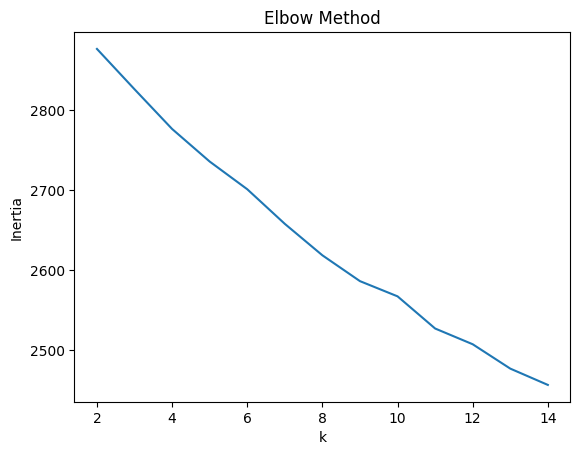

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 15):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(range(2,15), inertia)
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [33]:
kmeans = KMeans(n_clusters=9, random_state=42)
df['cluster'] = kmeans.fit_predict(X)

C:\Users\tanma\Envs\jupyter_notebook\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
df[['ResumeID','Category','cluster']].head()

,ResumeID,Category,cluster
0,REAL_0001,Java Developer,1
1,REAL_0002,Java Developer,1
2,REAL_0003,Java Developer,1
3,REAL_0004,Java Developer,1
4,REAL_0005,Java Developer,1


In [35]:
import numpy as np

terms = vectorizer.get_feature_names_out()

def get_top_terms(cluster_id, n=15):
    centroid = kmeans.cluster_centers_[cluster_id]
    indices = np.argsort(centroid)[::-1][:n]
    return [terms[i] for i in indices]

for c in range(8):
    print(f"\nCluster {c} Top Skills:")
    print(get_top_terms(c))



Cluster 0 Top Skills:
['network', 'security', 'cisco', 'firewall', 'network security', 'engineer', 'system', 'network engineer', 'security engineer', 'support', 'switch', 'server', 'hardware', 'management', 'router']

Cluster 1 Top Skills:
['using', 'web', 'application', 'java', 'developer', 'experience', 'spring', 'development', 'design', 'service', 'data', 'testing', 'devops', 'software', 'used']

Cluster 2 Top Skills:
['cybersecurity analyst', 'cybersecurity', 'designer', 'analyst', 'deliver', 'team', 'deliver critical', 'engineer deliver', 'critical project', 'team engineer', 'project schedule', 'led team', 'deliver major', 'collaborated cross', 'major feature']

Cluster 3 Top Skills:
['full stack', 'stack', 'stack developer', 'full', 'developer', 'deliver', 'software', 'engineer', 'software developer', 'software engineer', 'improved system', 'optimization technique', 'performance optimization', 'team', 'mongodb']

Cluster 4 Top Skills:
['database', 'data', 'server', 'sql server',

# Candidate Scoring

In [36]:
from sklearn.metrics.pairwise import cosine_similarity

def score_resume(job_text):
    job_vec = vectorizer.transform([job_text])
    job_cluster = kmeans.predict(job_vec)[0]

    cluster_resumes = df[df['cluster'] == job_cluster]

    resume_vecs = X[cluster_resumes.index]

    similarities = cosine_similarity(job_vec, resume_vecs)[0]

    cluster_resumes['score'] = similarities

    return cluster_resumes.sort_values(by='score', ascending=False)[
        ['ResumeID','Category','score']
    ].head(10)


In [39]:
job_desc = "Looking for cloud engineer job with 2 years of experience as cloud engineer lead"
score_resume(job_desc)

C:\Users\tanma\AppData\Local\Temp\ipykernel_11852\3874184309.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_resumes['score'] = similarities


,ResumeID,Category,score
2601,SYNTH_2602,Cloud Engineer,0.521024
2591,SYNTH_2592,Cloud Engineer,0.515858
2650,SYNTH_2651,Cloud Engineer,0.511851
2616,SYNTH_2617,Cloud Engineer,0.506019
2639,SYNTH_2640,Cloud Engineer,0.505997
2634,SYNTH_2635,Cloud Engineer,0.502241
2621,SYNTH_2622,Cloud Engineer,0.502012
2576,SYNTH_2577,Cloud Engineer,0.500492
2609,SYNTH_2610,Cloud Engineer,0.500428
2648,SYNTH_2649,Cloud Engineer,0.497302


In [42]:
# skill_match_weight = 0.40
# title_match_weight = 0.25
# experience_weight  = 0.20
# cluster_weight     = 0.10
# keyword_weight     = 0.05

def normalize_score(sim):
    return round(min(max(sim * 10, 0), 10), 2)


In [43]:
def title_match_score(job_text, resume_text):
    job_words = set(job_text.lower().split())
    resume_words = set(resume_text.lower().split())
    overlap = job_words & resume_words
    return min(len(overlap) / 3, 1.0) * 10


In [44]:
import re

def experience_score(job_text, resume_text):
    job_years = re.findall(r'(\d+)\s+years', job_text.lower())
    resume_years = re.findall(r'(\d+)\s+years', resume_text.lower())

    if not job_years or not resume_years:
        return 5   # neutral baseline

    job_y = int(job_years[0])
    res_y = max(map(int, resume_years))

    diff = abs(job_y - res_y)

    if diff <= 1: return 10
    if diff <= 2: return 8
    if diff <= 3: return 6
    return 4


In [45]:
def cluster_bonus(job_vec, resume_cluster, kmeans):
    job_cluster = kmeans.predict(job_vec)[0]
    return 10 if job_cluster == resume_cluster else 4


In [46]:
from sklearn.metrics.pairwise import cosine_similarity

def evaluate_resume(job_text, resume_text, resume_vec, resume_cluster, job_vec):
    
    base = normalize_score(
        cosine_similarity(job_vec, resume_vec)[0][0]
    )

    score = (
        base * 0.40 +
        title_match_score(job_text, resume_text) * 0.25 +
        experience_score(job_text, resume_text) * 0.20 +
        cluster_bonus(job_vec, resume_cluster, kmeans) * 0.10
    )

    return round(score, 2)


In [56]:
def score_resume_v2(job_text):
    job_vec = vectorizer.transform([job_text])
    job_cluster = kmeans.predict(job_vec)[0]

    cluster_df = df[df['cluster'] == job_cluster]
    resume_vecs = X[cluster_df.index]

    scores = []

    for idx, row in cluster_df.iterrows():
        resume_text = row['final_text']
        resume_vec = resume_vecs[cluster_df.index.get_loc(idx)]

        s = evaluate_resume(
            job_text,
            resume_text,
            resume_vec,
            row['cluster'],
            job_vec
        )

        scores.append((row['ResumeID'], row['Category'], s))

    result = pd.DataFrame(scores, columns=["ResumeID","Category","final_score"])
    return result.sort_values(by="final_score", ascending=False).head(10)


In [58]:
job_desc = "Looking for test engineer job with 2 years of experience as cloud engineer lead"
result=score_resume_v2(job_desc)
print(result)

      ResumeID          Category  final_score
550  REAL_1178           Testing         6.01
557  REAL_1191           Testing         5.76
537  REAL_1145           Testing         5.56
559  REAL_1201           Testing         5.42
462  REAL_0728            DevOps         5.28
575  REAL_1238           Testing         5.26
460  REAL_0726            DevOps         5.24
570  REAL_1225           Testing         5.16
549  REAL_1176           Testing         5.16
821  REAL_1594  DotNet Developer         5.14
